      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
Linear Regression:
  Mean Squared Error: 2.91
  R^2 Score: 0.91
Random Forest:
  Mean Squared Error: 1.44
  R^2 Score: 0.95
Gradient Boosting:
  Mean Squared Error: 1.28
  R^2 Score: 0.96


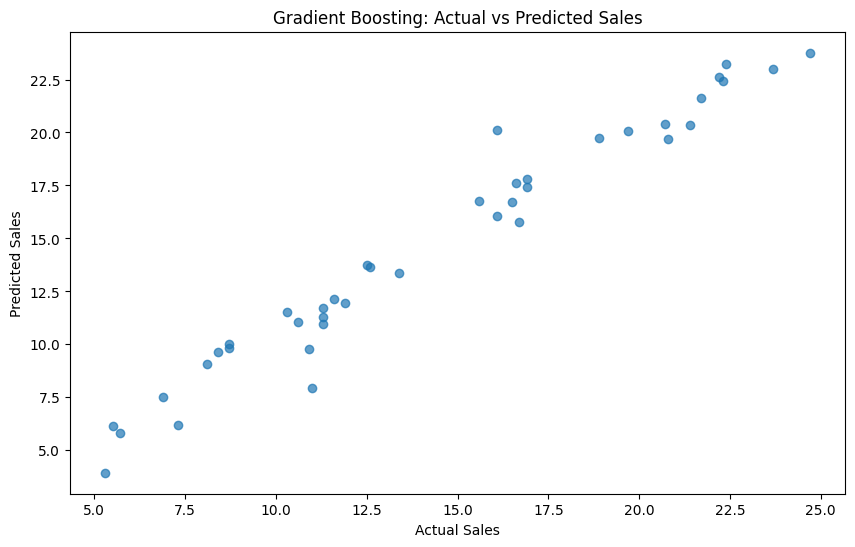

In [2]:
# Rhythm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('advertising.csv')

# Display the first few rows of the dataset
print(data.head())

# Split the dataset into features and target
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {
        'MSE': mse,
        'R2 Score': r2
    }

# Display results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Mean Squared Error: {metrics['MSE']:.2f}")
    print(f"  R^2 Score: {metrics['R2 Score']:.2f}")

# Optional: Visualize predictions vs actual sales for the best model
best_model_name = max(results, key=lambda k: results[k]['R2 Score'])
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.7)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title(f'{best_model_name}: Actual vs Predicted Sales')
plt.show()
